# Ensemble Learning Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('fifa2023_cleaned.csv')

In [3]:
data.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26,34,32,13,5,7,11,6


### Creating our dataset for the modeliing

So we have around 65 columns and we still have to do some cleaninng, I need to handle ID, Name and Nationalitycolumns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18447 non-null  int64  
 1   Name               18447 non-null  object 
 2   Age                18447 non-null  int64  
 3   Height             18447 non-null  int64  
 4   Weight             18447 non-null  int64  
 5   Overall            18447 non-null  int64  
 6   Potential          18447 non-null  int64  
 7   Growth             18447 non-null  int64  
 8   TotalStats         18447 non-null  int64  
 9   BaseStats          18447 non-null  int64  
 10  BestPosition       18447 non-null  int64  
 11  Club               18447 non-null  int64  
 12  ValueEUR           18447 non-null  int64  
 13  WageEUR            18447 non-null  int64  
 14  ReleaseClause      18447 non-null  int64  
 15  ContractUntil      18447 non-null  float64
 16  ClubJoined         184

In [5]:
data.describe()

,ID,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,BestPosition,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,...,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000,18447.000000
mean,237025.423755,25.229035,181.549574,75.175584,65.835475,71.013119,5.177644,1602.077031,357.862525,3.283135,...,48.001301,58.027538,46.751721,48.412967,46.271914,16.371714,16.126904,16.034748,16.177590,16.439475
std,26675.914587,4.718162,6.858985,7.012374,6.789479,6.198201,5.378722,273.053154,39.631637,2.737258,...,15.715395,12.031681,20.340569,21.175260,20.688321,17.540857,16.881137,16.645266,17.040353,17.877237
min,1179.000000,16.000000,155.000000,49.000000,47.000000,48.000000,0.000000,759.000000,224.000000,0.000000,...,6.000000,13.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,221682.000000,21.000000,177.000000,70.000000,62.000000,67.000000,0.000000,1470.000000,331.000000,1.000000,...,39.000000,51.000000,29.000000,28.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,241233.000000,25.000000,182.000000,75.000000,66.000000,71.000000,4.000000,1640.000000,358.000000,3.000000,...,49.000000,59.000000,53.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,259024.500000,29.000000,186.000000,80.000000,70.000000,75.000000,9.000000,1786.000000,385.000000,5.000000,...,60.000000,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,271817.000000,44.000000,206.000000,105.000000,91.000000,95.000000,26.000000,2312.000000,502.000000,9.000000,...,92.000000,96.000000,92.000000,93.000000,90.000000,90.000000,90.000000,93.000000,91.000000,90.000000


Split the data by dropping and have X and Y columns

In [6]:
X = data.drop(['ID', 'Name', 'Nationality'], axis = 1)
Y = pd.DataFrame(data['BestPosition'])

In [7]:
X.head()

,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,BestPosition,Club,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,35,169,67,91,91,0,2190,452,1,453,...,75,96,20,35,24,6,11,15,14,8
1,34,185,81,91,91,0,2147,455,0,494,...,84,90,43,24,18,13,11,5,5,7
2,33,185,81,91,91,0,2205,458,0,230,...,90,88,35,42,19,15,6,12,8,10
3,31,181,70,91,91,0,2303,483,1,399,...,83,89,68,65,53,15,13,5,10,13
4,23,182,73,91,95,4,2177,470,0,453,...,80,88,26,34,32,13,5,7,11,6


In [8]:
Y.head()

,BestPosition
0,1
1,0
2,0
3,1
4,0


#### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 101)

#### Lets see our dataset and distribution of our BestPosition Classes

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

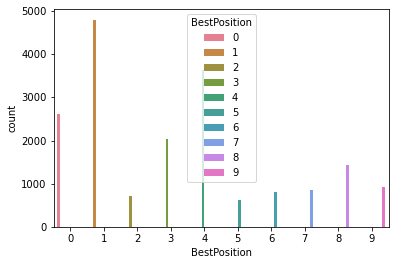

In [11]:
sns.countplot(x = 'BestPosition', data=data, hue='BestPosition', palette = 'husl')

In [12]:
#position_map = {'CF': 0, 'CM': 1, 'RW': 2, 'GK': 3, 'CB': 4, 'LW': 5, 'LM': 6, 'LB': 7, 'RM':  8, 'RB': 9}

#### We observe an imbalanced dataset, which we can fix
Why fix? -> To prevent model becoming biased towards one/more particular class.

We can fix by artificially imputing data.

But the way we do this is my 2 ways.
The ways are
1. Undersampling -> Done w.r.t lowest or some threshold value, this will reduce data.
2. Oversampling -> Done w.r.t lowest or some value, this will increase dataset but but may introduce some variance in data.
3. Combination of both.

There exist several methods.
1. KNN
2. SVM
3. SMOTE
4. Kmeans

In [13]:
from imblearn.over_sampling import RandomOverSampler

Setting random sampler to Auto to oversample all classes

In [14]:
oversample = RandomOverSampler(sampling_strategy= 'auto')

In [15]:
X_train_re, y_train_re = oversample.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

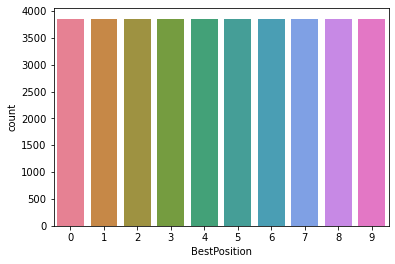

In [16]:
sns.countplot(x='BestPosition', data =y_train_re, palette = 'husl')

Now lest set the sampling_strategy to minority and lets do this iteratively

In [17]:
oversample_rei = RandomOverSampler(sampling_strategy= 'minority')

In [18]:
X_train_rei, y_train_rei = oversample_rei.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

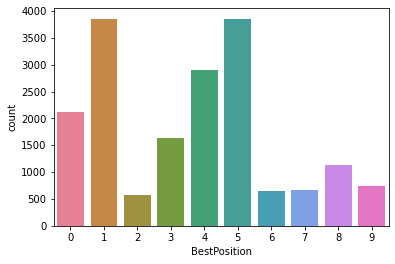

In [19]:
sns.countplot(x='BestPosition', data =y_train_rei, palette = 'husl')

In [20]:
X_train_rei, y_train_rei = oversample_rei.fit_resample(X_train_rei, y_train_rei)

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

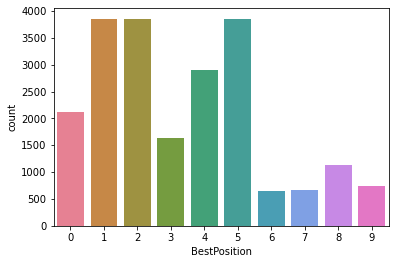

In [21]:
sns.countplot(x='BestPosition', data =y_train_rei, palette = 'husl')

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

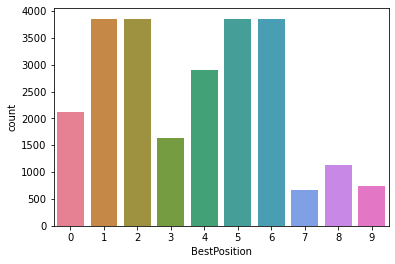

In [22]:
X_train_rei, y_train_rei = oversample_rei.fit_resample(X_train_rei, y_train_rei)
sns.countplot(x='BestPosition', data =y_train_rei, palette = 'husl')

Now taking and further processing the Training data ***X_train_re, X_test_re, y_train_re, y_test_re***

### Feature Scaling

This will help me transform data/normaize it so fetures are given equal importance and weights are equally distributed.

Cuurent sscale -> 0 - 100, I will convert it between 0 - 1

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

X_train_final = scaler.fit_transform(X_train_re)
X_test_final = scaler.fit_transform(X_test)

In [25]:
X_train_final.shape, y_train_re.shape

((38550, 62), (38550, 1))

In [26]:
y_train_final = y_train_re

## Statistical Modelling or Model Training

Traget colum or variable is a Muliclass.

We will be doing MultiClass Classification.

We will use all sorts of algorithms that we have learnt till for classification i.e., Decision Trees, SVM, Logistic Regression

Random Forest(Bagging)

Metrics for evaluation

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(X_train_final, y_train_final)

c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_preds_lr = lr.predict(X_test_final)

In [32]:
confusion_matrix(y_test, y_preds_lr)

array([[505,   5,   2,   0,   0,   0,   0,   0,   0,   0],
       [ 31, 881,  35,   0,   0,   0,   0,   0,   0,   0],
       [  5,  13, 110,   0,   0,   4,   0,   0,   0,   0],
       [  0,   0,   0, 406,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0, 708,  25,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2, 116,  11,   3,   0,   0],
       [  0,   0,   0,   0,   0,  28, 127,   2,   0,   0],
       [  0,   0,   0,   0,   1,   0,   1, 172,   0,  16],
       [  0,   0,   0,   0,   0,   0,   0,   1, 286,  15],
       [  0,   0,   0,   0,   0,   0,   0,   1,   5, 172]], dtype=int64)

In [33]:
print(classification_report(y_test, y_preds_lr))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       512
           1       0.98      0.93      0.95       947
           2       0.74      0.83      0.79       132
           3       1.00      1.00      1.00       406
           4       1.00      0.96      0.98       734
           5       0.67      0.88      0.76       132
           6       0.91      0.81      0.86       157
           7       0.96      0.91      0.93       190
           8       0.98      0.95      0.96       302
           9       0.85      0.97      0.90       178

    accuracy                           0.94      3690
   macro avg       0.90      0.92      0.91      3690
weighted avg       0.95      0.94      0.95      3690



#### Without Handling imbalanced dataset and without feature scaling techniques

In [34]:
lr_1 = LogisticRegression()

In [35]:
lr_1.fit(X_train, y_train)

c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_preds_lr_1 = lr_1.predict(X_test)

Utter fail

In [37]:
confusion_matrix(y_test, y_preds_lr_1)

array([[  0, 509,   0,   2,   0,   0,   0,   0,   0,   1],
       [  0, 939,   0,   3,   0,   0,   0,   0,   0,   5],
       [  0, 131,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0, 406,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 730,   0,   0,   0,   0,   0,   0,   0,   4],
       [  0, 130,   0,   0,   0,   0,   0,   0,   0,   2],
       [  0, 154,   0,   1,   0,   0,   0,   0,   0,   2],
       [  0, 189,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0, 300,   0,   2,   0,   0,   0,   0,   0,   0],
       [  0, 177,   0,   0,   0,   0,   0,   0,   0,   1]], dtype=int64)

In [38]:
print(classification_report(y_test, y_preds_lr_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           1       0.26      0.99      0.41       947
           2       0.00      0.00      0.00       132
           3       0.00      0.00      0.00       406
           4       0.00      0.00      0.00       734
           5       0.00      0.00      0.00       132
           6       0.00      0.00      0.00       157
           7       0.00      0.00      0.00       190
           8       0.00      0.00      0.00       302
           9       0.07      0.01      0.01       178

    accuracy                           0.25      3690
   macro avg       0.03      0.10      0.04      3690
weighted avg       0.07      0.25      0.11      3690



c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Now lets start with our Ensemble which will be Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=50)

In [41]:
rf.fit(X_train_final, y_train_final)

<ipython-input-41-ddd226a907ae>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_final, y_train_final)


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [42]:
y_preds_rf = rf.predict(X_test_final)

In [43]:
confusion_matrix(y_test, y_preds_rf)

array([[498,  14,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7, 939,   1,   0,   0,   0,   0,   0,   0,   0],
       [  5,  19, 107,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0, 406,   0,   0,   0,   0,   0,   0],
       [  0,   4,   2,   0, 728,   0,   0,   0,   0,   0],
       [  0,   1,   4,   0,   7, 115,   2,   1,   1,   1],
       [  0,   0,   0,   0,   0,   1, 151,   1,   4,   0],
       [  0,   0,   0,   0,   0,   0,   1, 180,   1,   8],
       [  0,   0,   0,   0,   0,   0,   0,   1, 298,   3],
       [  0,   0,   0,   0,   1,   0,   0,   1,   2, 174]], dtype=int64)

In [44]:
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       512
           1       0.96      0.99      0.98       947
           2       0.94      0.81      0.87       132
           3       1.00      1.00      1.00       406
           4       0.99      0.99      0.99       734
           5       0.99      0.87      0.93       132
           6       0.98      0.96      0.97       157
           7       0.98      0.95      0.96       190
           8       0.97      0.99      0.98       302
           9       0.94      0.98      0.96       178

    accuracy                           0.97      3690
   macro avg       0.97      0.95      0.96      3690
weighted avg       0.97      0.97      0.97      3690



In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
ada = AdaBoostClassifier()

In [47]:
ada.fit(X_train_final, y_train_final)

c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [48]:
y_preds_ada = ada.predict(X_test_final)

In [49]:
confusion_matrix(y_test, y_preds_ada)

array([[  0,   0, 512,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 947,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 132,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 406,   0,   0,   0,   0,   0,   0],
       [  0,   0, 734,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 132,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 157,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 190,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 302,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 178]], dtype=int64)

In [50]:
print(classification_report(y_test, y_preds_ada))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           1       0.00      0.00      0.00       947
           2       0.04      1.00      0.08       132
           3       1.00      1.00      1.00       406
           4       0.00      0.00      0.00       734
           5       0.00      0.00      0.00       132
           6       0.00      0.00      0.00       157
           7       0.00      0.00      0.00       190
           8       0.00      0.00      0.00       302
           9       1.00      1.00      1.00       178

    accuracy                           0.19      3690
   macro avg       0.20      0.30      0.21      3690
weighted avg       0.16      0.19      0.16      3690



c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now since we had not passed any value for our estimator we will pass now

In [51]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [72]:
#weak_learner = LogisticRegression()
weak_learner = DecisionTreeClassifier(criterion= 'entropy')
#weak_learner = SVC(probability=True, kernel = 'linear')


In [73]:
ada_lr = AdaBoostClassifier(estimator=weak_learner, n_estimators=40)

In [74]:
ada_lr.fit(X_train, y_train)

c:\Users\rutwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_estimators=40)

In [75]:
y_reds_ada_lr = ada_lr.predict(X_test)

In [76]:
confusion_matrix(y_test, y_reds_ada_lr)

array([[512,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 947,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 132,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 406,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 734,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 132,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 157,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 190,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 302,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 178]], dtype=int64)

In [77]:
print(classification_report(y_test, y_reds_ada_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       512
           1       1.00      1.00      1.00       947
           2       1.00      1.00      1.00       132
           3       1.00      1.00      1.00       406
           4       1.00      1.00      1.00       734
           5       1.00      1.00      1.00       132
           6       1.00      1.00      1.00       157
           7       1.00      1.00      1.00       190
           8       1.00      1.00      1.00       302
           9       1.00      1.00      1.00       178

    accuracy                           1.00      3690
   macro avg       1.00      1.00      1.00      3690
weighted avg       1.00      1.00      1.00      3690

